<a href="https://colab.research.google.com/github/sammothxc/math215-w24/blob/main/labs/Linear_transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab 8 - Linear Transformations**

Enter your code in the spaces provided. Do not change any of the variable names or function names that are already provided for you. In places where we specify the name of the return value, make sure that your code produces the a value with the correct name.

In [29]:
# Do not edit this cell.

LabID="Lab8"

try:
  from graderHelp import ISGRADEPLOT
except ImportError:
  ISGRADEPLOT = True

**Enter your name, section number, and BYU NetID**

In [30]:
# Enter your first and last names in between the quotation marks.

first_name="Sam"

last_name="Warr"

# Enter your Math 215 section number in between the quotation marks.

section_number="01"

# Enter your BYU NetID in between the quotation marks.  NOT YOUR BYU ID NUMBER!

BYUNetID="warrior8"

**Import NumPy**

In [31]:
import numpy as np

**Problem 1**

In [32]:
# This function reads in a vector and outputs the transformed vector Ax.

def transform(x):
    A = np.array([[2, 1], [1, -3], [0, 1]])
    return np.dot(A, x)

result = transform(np.array([1, 2]))
print(result)

[ 4 -5  2]


**Downloading and visualizing our data**

The simplest way to load the data into Colab is to first download it as a .csv file to your local computer by clicking the link

https://drive.google.com/uc?export=download&id=1tWus0zXDSahrms0dl8TTV0Pl8bbWlx9j

This will allow you to download the data as a .csv file. In the top left corner of this screen you should see a little file folder icon.   Selecting it opens a new window to the left of the notebook with three tabs: "Upload", "Refresh", and "Mount Drive". Select "Upload".  This should bring up a window that allows you to select the file "cougar.csv" from your local machine, which will upload the file to your notebook.  You will need to do this again if you decide to close your notebook and reopen it at a later time.

Once you've uploaded your file, convert it to a NumPy array called "cougar" by executing the following cell.

In [33]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('cougar.csv')
cougar=df.values
cougar

array([[ 0.11833, -0.665  ,  0.035  , ..., -0.1    ,  0.685  , -0.51   ],
       [-0.265  ,  0.44333, -0.84833, ...,  0.115  ,  0.31167,  0.69667]])

Now let's define a function that we can use to plot the array cougar that we've just created (or any other array of points which we'd like to visualize).

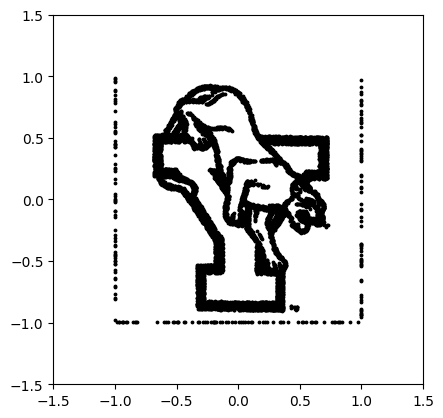

In [34]:
def showplot(H):
  # This function displays the image produce by the collection of coordinates given in H
  cougarplot=plt.plot(H[0,:],H[1,:],'k.',markersize=3.5)
  plt.axis([-1.5,1.5,-1.5,1.5])
  plt.gca().set_aspect("equal")
  plt.show()
  return None


# Let's test the function above by plotting the data in our NumPy array cougar
showplot(cougar)

**Problem 2**

In [35]:
# This function should take a matrix of coordinates, and output a matrix which corresponds to the image that has been stetched in the
# horizantal direction by a factor of a and in the verticle direction by a factor of b.

def stretch(image,a,b):
  A = np.array([[a, 0], [0, b]])
  return np.dot(A, image)

In [36]:
# This function should take a matrix of coordinates, and output a matrix which corresponds to the image that has been sheared by a horizantal factor of a and
# a vertical factor of b

def shear(image,a,b):
  A = np.array([[1, a], [b, 1]])
  return np.dot(A, image)

In [46]:
# This function should take a matrix of coordinates, and output a matrix which corresponds to the image that has been reflected in the
# line spanned by the vector [a,b]^T

def reflect(image, a, b):
    # Reflection transformation matrix
    A = np.array([[(a**2-b**2)/(a**2+b**2),(2*a*b)/(a**2+b**2)],[(2*a*b)/(a**2+b**2),(b**2-a**2)/(a**2+b**2)]])
    return np.matmul(A, image)

In [45]:
# This function should take a matrix of coordinates, and output a matrix which corresponds to the image that has been rotated in the
# counterclockwise direction by an angle of theta radians.

def rotate(image,theta):
  rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
  return np.dot(rotation_matrix, image)

**Problem 3**

In [39]:
iden=np.array([[1,0],[0,1]]) # The identity matrix may be helpful here.
stretch_matrix = stretch(iden, 1, 2)
rotate_matrix = rotate(stretch_matrix, -np.pi/4)
reflect_matrix = reflect(rotate_matrix, -2/np.sqrt(13), 3/np.sqrt(13))
comp_matrix = stretch(reflect_matrix, 0.5, 1)

The following code can be copied to your practice notebook and used to visualize the linear transformations in the following questions.

In [40]:
from matplotlib import pyplot as plt
import numpy as np

def plot_transformation(mat):
    plt.cla()
    e1=np.array([1,0])
    e2=np.array([0,1])
    v3=e1+e2
    plot_lims=abs(np.array([[0,1],mat@e1,mat@v3,mat@e2])).max()
    trans_square=plt.Polygon([mat@e1,mat@v3,mat@e2,[0,0]],ec=(0,0,1,1),fc=(0,0,1,0.5))
    orig_square=plt.Polygon([e1,v3,e2,[0,0]],fc=(1,0,0,0.5),ec=(1,0,0,1))
    plt.gca().add_patch(trans_square)
    plt.gca().add_patch(orig_square)
    plt.axis('scaled')
    plt.ylim(-1.05*plot_lims,1.05*plot_lims)
    plt.xlim(-1.05*plot_lims,1.05*plot_lims)
    ax=plt.gca()
    ax.spines['top'].set_position(('data',0))
    ax.spines['right'].set_position(('data',0))
    ax.spines['bottom'].set_position(('data',0))
    ax.spines['left'].set_position(('data',0))
    plt.show()
    return

**Problem 4**

In [41]:
def area(A):
  # Unit vectors
  e1 = np.array([1, 0])
  e2 = np.array([0, 1])

  # Transform unit vectors
  T_e1 = np.dot(A, e1)
  T_e2 = np.dot(A, e2)

  # Lengths of transformed edges
  length_T_e1 = np.linalg.norm(T_e1)
  length_T_e2 = np.linalg.norm(T_e2)

  # Angle between transformed edges (in radians)
  cos_theta = np.dot(T_e1, T_e2) / (length_T_e1 * length_T_e2)
  theta = np.arccos(cos_theta)

  # Area of the parallelogram
  area = length_T_e1 * length_T_e2 * np.sin(theta)
  
  return area


**Problem 5**

In [42]:
# Save the values of the determinants of the matrices A,B,C, and D from Problem 5.

M = np.array([[2, 1], [-2, 4]])
N = np.array([[3, 1], [2, -1]])
P = np.array([[-1, 2], [-1, -1]])
Q = np.array([[0.6, -0.5], [0.2, -0.5]])

# Compute determinants
detM = np.linalg.det(M)
detN = np.linalg.det(N)
detP = np.linalg.det(P)
detQ = np.linalg.det(Q)

**Problem 6**

In [47]:
# Save the values of the matrix A and the area of the ellipse from Problem 6.

a = np.array([[1.5, 1],[0.5, -2.75]])
iden = np.array([[1, 0], [0, 1]])
ellipse_matrix=np.matmul(a, iden)
detA = np.linalg.det(a)
ellipse_area = np.pi*np.abs(detA)

**Problem 7**

In [44]:
# Save the values of the determinants of the matrices B1,B3,B6, and B0 from Problem 5.

detB1=np.linalg.det(np.array([[4, 3], [2, 6]]))

detB3=np.linalg.det(np.array([[1.5, 3], [2, 6]]))

detB6=np.linalg.det(np.array([[1.00001, 3], [2, 6]]))

detB0=np.linalg.det(np.array([[1, 3], [2, 6]]))

**STOP!  BEFORE YOU SUBMIT THIS LAB:**  Go to the "Runtime" menu at the top of this page, and select "Restart and run all".  If any of the cells produce error messages, you will either need to fix the error(s) or delete the code that is causing the error(s).  Then use "Restart and run all" again to see if there are any new errors.  Repeat this until no new error messages show up.  

**You are not ready to submit until you are able to select "Restart and run all" without any new error messages showing up. Your code will not be able to be graded if there are any error messages.**

To submit your lab for grading you must first download it to your compute as .py file. In the "File" menu select "Download .py". The resulting file can then be uploaded to [gradescope.com](https://gradescope.com) for grading.